In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
# To use only Google Colab
# ! pip install matplotlib --upgrade


# Unidad I. Variables, distribuciones y pruebas de hipótesis.

- Características numéricas de las variables aleatorias
- Concepto de muestra
- Estimación estadística de los parámetros de una distribución a partir de los
datos de una muestra



## Análisis descriptivo de datos

La estadística descriptiva:
  - quiere describir una muestra de manera
    - cualitativa (gráfica) o
    - cuantitativa (numérica)
  - ligada al
    - análisis exploratorio
    - análisis inicial
  - búsqueda de hipótesis
    - nuevos muestreos
    - experimentos

La estadística inferencial:
  - quiere inferir propiedades acerca de la población
  - se focaliza en:
    - asegurar la calidad de los datos
    - chequear las suposiciones
    - testear la hipótesis que tenemos en mente


## Muestra estadística

Muestra:
  - subconjunto de datos
    - tomados de una población estadística
    - mediante un proceso de muestreo determinado.

Observación:
  - Cada una de las unidades muestrales
  - es posible medir variables aleatorias sobre una observación.

Las **muestras** pueden ser:
- **Completas**:
  - Incluye a todos los casos, individuos u objetos de la población..
    que cumplen con un criterio (de selección) determinado.
  - Es difícil o imposible disponer de muestras completas.
- **Representativas**:
  - Conjunto de unidades muestrales seleccionadas de una muestra completa
  - usando un proceso de selección/muestreo que no depende de las propiedades de
    estas unidades.
  - Una manera de obtener muestras no sesgadas es seleccionando una
    **muestra aleatoria**


## Técnicas de muestreo

### Muestreo aleatorio simple

- Se selecciona un número k de unidades
- de manera aleatoria
- cada unidad tiene la misma probabilidad de ser seleccionado.
- El muestreo puede ser:
  - con reposición:
    - cada unidad puede ser seleccionada más de una vez.
  - sin reposición:
    - cada unidad puede ser seleccionada solo una vez.
    - seleccionar un elemento altera las probabilidades de selección del
      siguiente.
    - sin embargo cualquir orden de extracciñon es equiprobable.
  - Si el tamaño de la población es mucho mayor al tamaño de la muestra:
    - el muestreo con reposición y sin reposción se aproximan.

### Generación de muestras aleatorias en python

In [21]:
import numpy as np

population = np.arange(100)

sample_without_replacement = np.random.choice(
  a = population,
  size = 99,
  replace = False
)
all_different = len(np.unique(sample_without_replacement)) == 99

print(
  "Todos los elementos son diferentes en la muestra sin reemplazo? : "
  f"{all_different}"
)

sample_with_replacement = np.random.choice(
  a = population,
  size = 99,
  replace = True
)
all_different = len(np.unique(sample_with_replacement)) == 99

print(
  "Todos los elementos son diferentes en la muestra con reemplazo? : "
  f"{all_different}"
)


Todos los elementos son diferentes en la muestra sin reemplazo? : True
Todos los elementos son diferentes en la muestra con reemplazo? : False


In [25]:
# Se puede usar con elementos no numéricos también.
population = [
  "lunes",
  "martes",
  "miercoles",
  "jueves",
  "viernes",
  "sábado",
  "domingo"
]
np.random.choice(
  a = population,
  size = 5,
  replace = True
)

array(['jueves', 'viernes', 'miercoles', 'jueves', 'martes'], dtype='<U9')

### Muestreo sistemático

- Consiste en:
  - ordenar los elementos según alguna variable de interés
  - luego tomar n unidades muestrales equiespaciadas.
  - El primer elemento debe ser seleccionado al azar
    - quedando los otros determinados en relación a este.
- permite muestrear una variable de intereses en todo su rango.
- debe tenerse cuidado:
  - si la variable muestra alguna característica periódica
  - no se verá la variación entre dos elementos contiguos
    - nunca se seleccionan a la vez.

### Generación de muestras sistemáticas en python

- En este ejemplo vamoas a usar el conjunto de datos de **iris**.
  - Tamaño (ancho y largo) de pétalo y sépalo tres variantes de plantas.
- Vamos a ordenar según el largo de sus pétalos:

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np

iris = datasets.load_iris(as_frame=True)
df: pd.DataFrame = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df = df.sort_values(
  by="petal length (cm)",
)

sample_size = 17 # Aprox...
print(f"El tamaño de la muestra es {sample_size}")
spacing = int(round(len(df) / sample_size))
print(f"Los elementos estan espaciados cada {spacing} posiciones")
starting_position = np.random.randint(low=0, high=spacing-1)
print(f"Elijo una posición de inicio aleatoria: {starting_position}")
selected_positions = np.arange(len(df)) % spacing == starting_position
sample = df.iloc[selected_positions, :]
print(f"El tamaño real de la muestra es {len(sample)}")
sample


El tamaño de la muestra es 17
Los elementos estan espaciados cada 9 posiciones
Elijo una posición de inicio aleatoria: 4
El tamaño real de la muestra es 17


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
16,5.4,3.9,1.3,0.4,0
6,4.6,3.4,1.4,0.3,0
45,4.8,3.0,1.4,0.3,0
27,5.2,3.5,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
44,5.1,3.8,1.9,0.4,0
69,5.6,2.5,3.9,1.1,1
67,5.8,2.7,4.1,1.0,1
90,5.5,2.6,4.4,1.2,1
51,6.4,3.2,4.5,1.5,1


### Muestreo estratificado

- Se estratifica la población antes de tomar las muestras.
- Se divide la población en grupos homogéneos.
  - Los grupos son mutuamente excluyentes
  - Todos los miembros de la población deben pertenecer a un grupo
  - No pueden quedar miembros sin clasificar.
- Se realiza un muestreo de cada estrato
  - aleatorio simple
  - sistemático dentro



Existen tres posibles estrategias:
- **Asignación proporcional**:
  - El número de unidades de cada grupo:
    - es proporcional al número de individuos de cada grupo en la población.
  - Se respeta las proporciones de los grupos en la población.
- **Asignación óptima**:
  - El número de unidades de cada grupo:
    - es proporcional a la desviación estándar de la variable de interés.
- **Asignación uniforme**:
  - Igual número de elementos para cada grupo.
  - El dataset **iris** fue generado de esta forma.
    - 50 flores de cada especie.


La media del muestreo es:
 - $ \mu_{s} = \frac{1}{N} \sum_{h=1}^{L} N_{h} \mu_{h} $
 * $\mu_{s}$ es la media
 * $N$ es el tamaño de toda la población
 * $N_{h}$ es el tamaño del estrato h
 * $\mu_h$ es la media de la muestra del estrato h.


Ejercicio:
- Se quiere construir un set de datos similar a Iris, pero en lugar de 150
  muestras con 1000.
- Se quiere que la asignación sea óptima con respecto al largo del pétalo.
- ¿Cuántos elementos de cada especie deberían recolectarse?

## Estadísticos de resumen

Los estadísticos de resumen:
- describen de manera cuantitativa la distribución de una muestra.
- se describe cada variable aleatoria/dimensión manera independiente.

Existen estadísticos de:
- tendencia central
- dispersión
- forma:
  - asimetría (Skewness)
  - apuntamiento (Kurtosis)

Algunos estadísticos pueden ser robustos:
  - están menos afectados por valores extremos atípicos.
  - tienen bueana performance con muchos tipos de distribuciones.


### Estadísticos de tendencia central

Los estadísticos más comunes de este tipo:
- la *media*
  - Es el promedio aritmético de un conjunto de datos.
  - $\bar{X} = \frac{1}{N}\times{\sum_{i=1}^N{x_i}}$
  - No es robusto.
- La *mediana*.
  - Es el valor ubicado en el percentil 50 de una distribución.
- La *moda*
  - Es el valor más frecuente
    - es el único estadístico de tendencia central para datos nominales
  - Difícil de estimar correctamente para variables continuas.

In [8]:
df.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
target               1.000000
dtype: float64

In [9]:
df.median()

sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
target               1.00
dtype: float64

In [10]:
df.mode()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.0,3.0,1.4,0.2,0
1,NaN,NaN,1.5,NaN,1
2,NaN,NaN,NaN,NaN,2


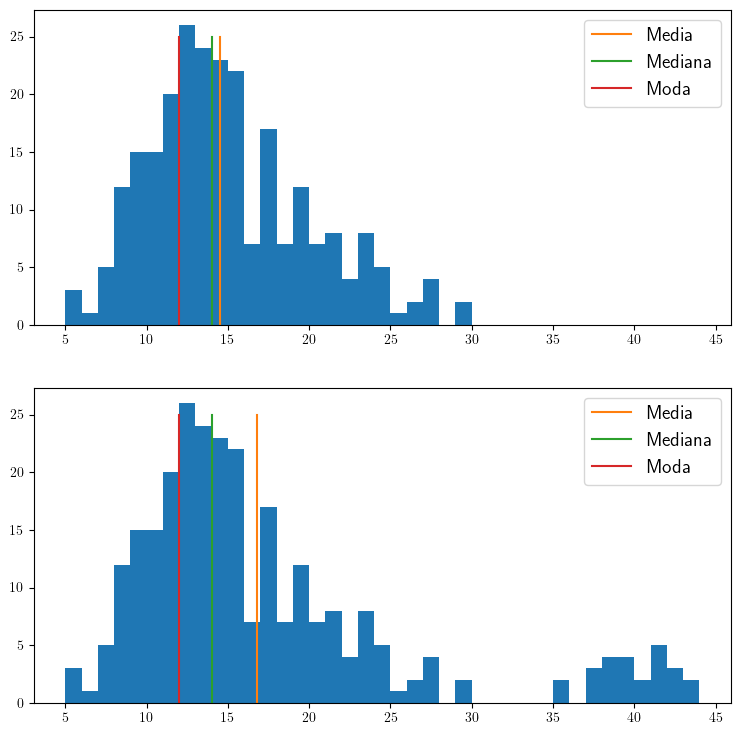

In [11]:
import C01
C01.mean_mode_median()


## Estadísticos de dispersión

- La *desviación estándar*
  - es el más popular
  - No es un estimador robusto.
  - $s=\sqrt{\frac{\sum_{i=1}^N{(x_i-\bar{x})^2}}{N-1}}$
  - Varianza: $s^2$
- El rango entre cuartiles:
  - Es la diferencia entre el tercer cuartil y el primer cuartil.
  - $Q_3 - Q_1$
- La desviación mediana absoluta **Median Absolute Deviation** (MAD).
  - Es análogo a la desviación estandard utilizando la mediana
  - $median(|X_i-median(X)|)$
- El rango:
  - Es la diferencia entre el valor máximo y mínimo.

In [12]:
df.std()

sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
target               0.819232
dtype: float64

In [13]:
df.quantile(0.75) - df.quantile(0.25) 

sepal length (cm)    1.3
sepal width (cm)     0.5
petal length (cm)    3.5
petal width (cm)     1.5
target               2.0
dtype: float64

In [14]:
(df - df.mean()).abs().median()

sepal length (cm)    0.656667
sepal width (cm)     0.257333
petal length (cm)    1.792000
petal width (cm)     0.799333
target               1.000000
dtype: float64

In [15]:
df.max() - df.min()

sepal length (cm)    3.6
sepal width (cm)     2.4
petal length (cm)    5.9
petal width (cm)     2.4
target               2.0
dtype: float64

((12.5, 82), (15.5, 82))


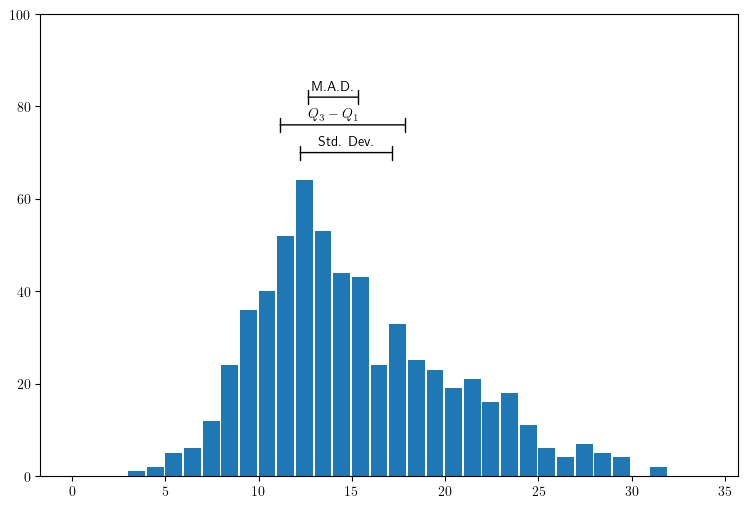

In [16]:
import C01
C01.dispersion_measures()

## Estadísticos de forma

Las medidas de forma de la distribución principales son:
  - el *Skewness* o *asimetría*
    - mide que tan simétricos son los datos con respecto a la media.
  - la *Kurtosis*
    - mide la concentración de datos cerca de la media.
  - El *exceso de kurtosis*
    - Es la diferencia con la kurtosis de la distribución normal estándar.
    - *Kurtosis - 3*
      - Igual a cero: igual a la distribución normal estándar.
      - Menor a cero: Más concentrado sobre la media.
      - Mayor a cero: Colas más pesadas.

In [17]:
df.skew()

sepal length (cm)    0.314911
sepal width (cm)     0.318966
petal length (cm)   -0.274884
petal width (cm)    -0.102967
target               0.000000
dtype: float64

In [18]:
df.kurtosis()

sepal length (cm)   -0.552064
sepal width (cm)     0.228249
petal length (cm)   -1.402103
petal width (cm)    -1.340604
target              -1.510135
dtype: float64

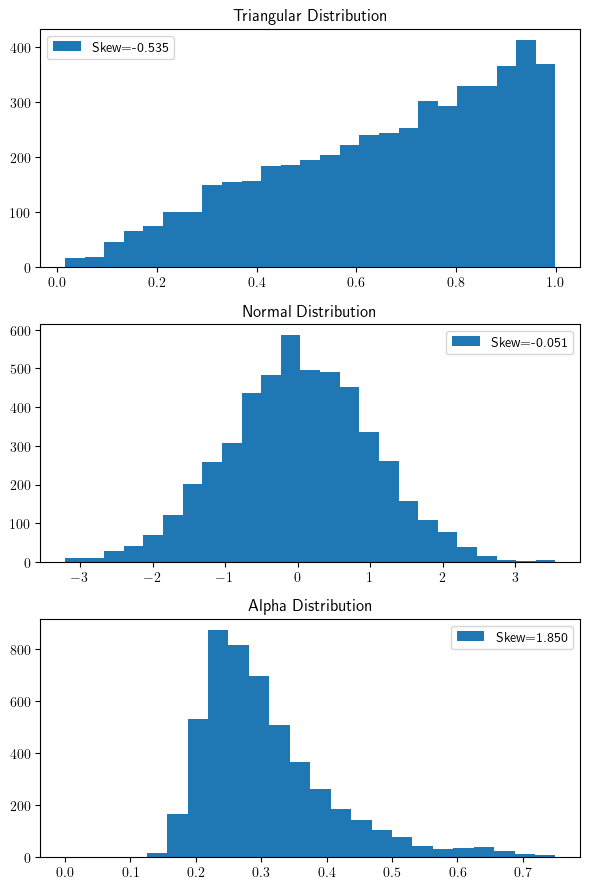

In [64]:
import C01
C01.skewness_plot()

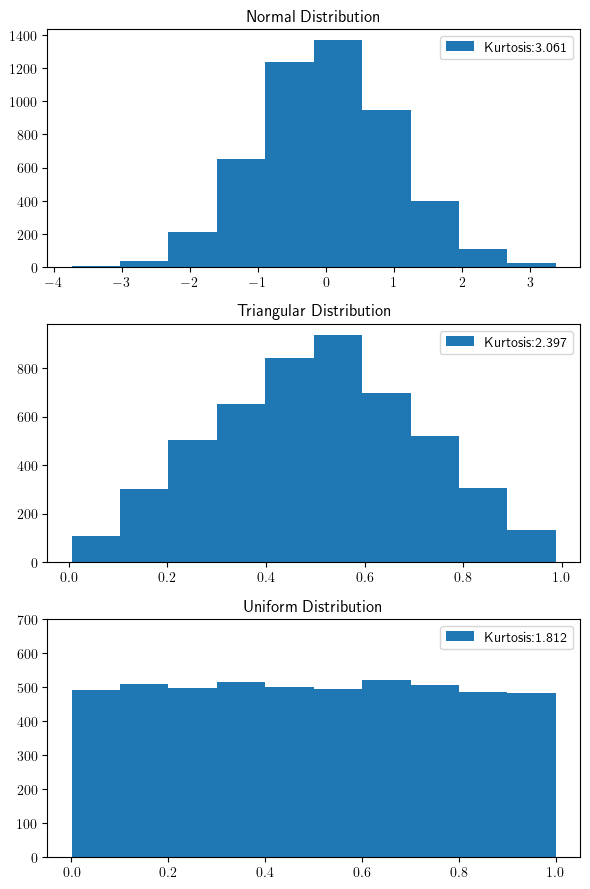

In [71]:
import C01
C01.kurtosis_plot()

## Descripción gráfica

Los *Histogramas* permiten:
- tener una visión de la forma de una distribución de densidad
  para una variable aleatoria continua.
- Se construyen:
  - Subdiviendo el dominio en grupos (*bins*)
  - contando el número de observaciones para cada *bin*.

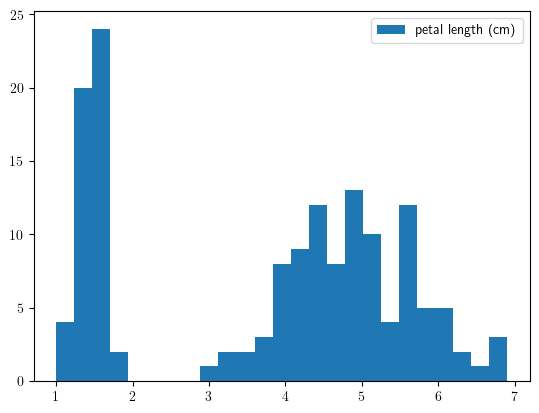

In [96]:
import matplotlib.pyplot as plt

var = "petal length (cm)"

plt.hist(
  df[var],
  bins = 25,
  label = var
)
plt.legend()


Los estimadores de núcleo de densidad (*Kernel Density Estimator*):
- generan curvas suaves que estiman la función de densidad de la muestra
- Tiene dos parámetros importantes:
  - Una función de probabilidad (kernel)
    - Por defecto se usa la distribución normal.
  - El ancho de banda a utilizar.
  - $\hat{f}(x) = \frac{1}{nh}\sum_{i=1}^{n}K(\frac{x-x_i}{h})$
    - $K$ en la función de kernel
    - $h$ es el ancho de banda


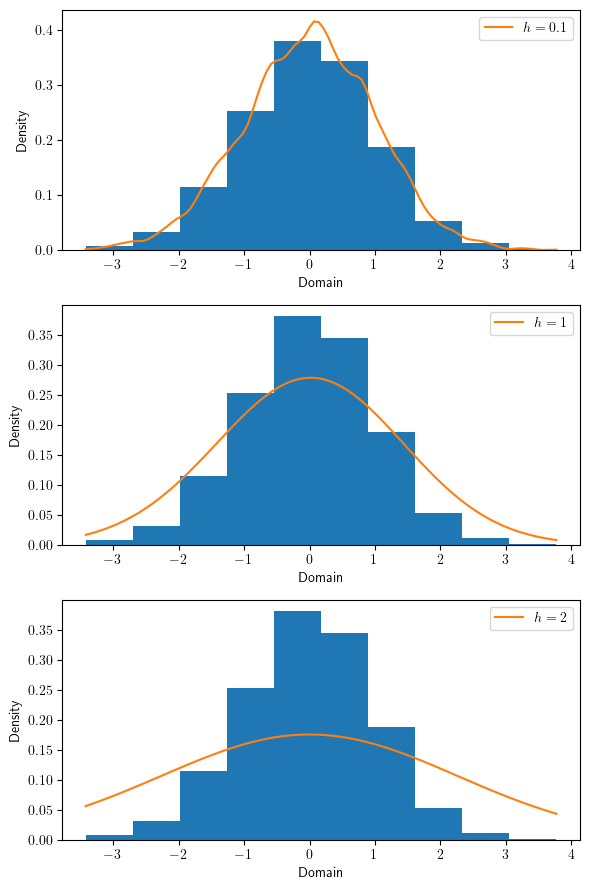

In [79]:
import C01
C01.kde_plot()

Los Diagramas de Dispersión:
- utilizan las coordenadas cartesianas
- muestran la distribución de dos variables en un espacio bi dimensional.
- Es posible representar más dimensiones utilizado diferentes formas, tamaños
  y/o colores.


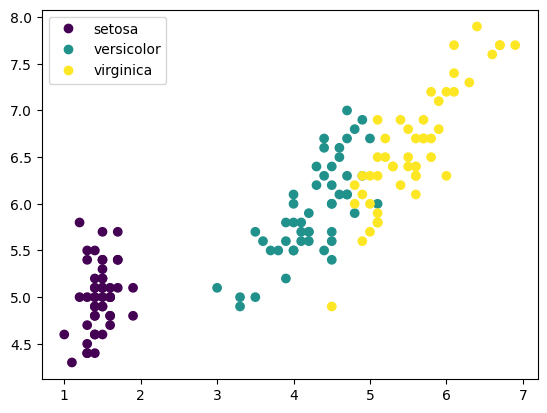

In [5]:
import matplotlib.pyplot as plt

var1 = "petal length (cm)"
var2 = "sepal length (cm)"

scatter = plt.scatter(
  x = df[var1],
  y = df[var2],
  c = df["target"]
)
a, b = scatter.legend_elements()
plt.legend(a, iris["target_names"])

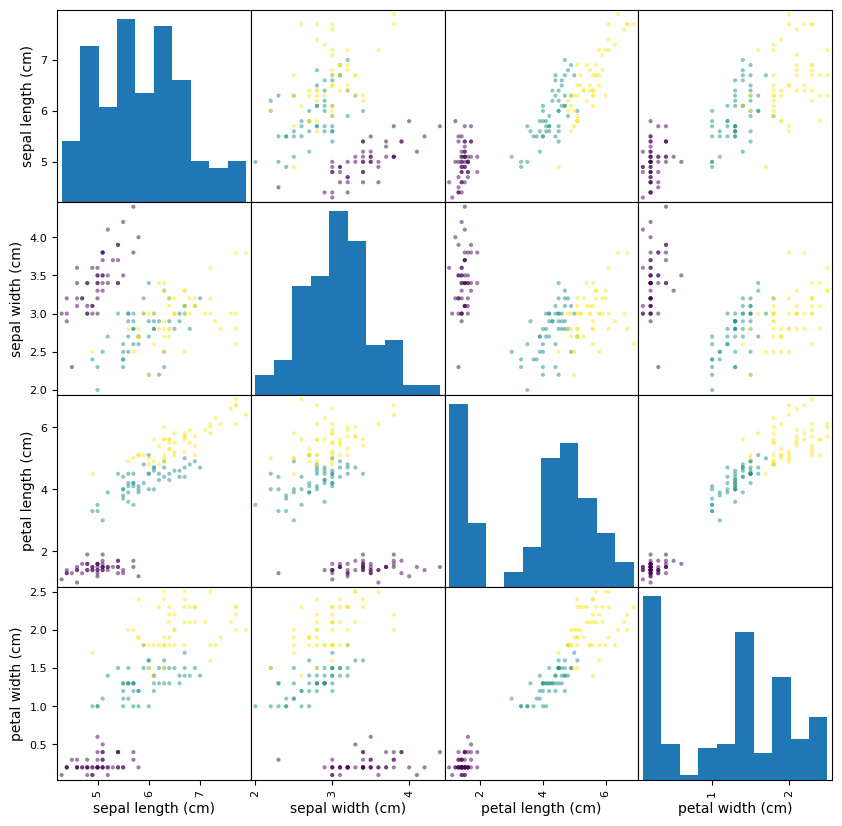

In [6]:
_ = pd.plotting.scatter_matrix(
  df.iloc[:,0:4],
  figsize=(10,10),
  c = df["target"]
)

Histogramas bivariados

- Los grupos (bins) se establecen para las dos variables
- se definen rectángulos
- Normalmente se utiliza un código de color para
  indicar la cantidad de valores en cada grupo.


Text(0, 0.5, 'Petal width (cm)')

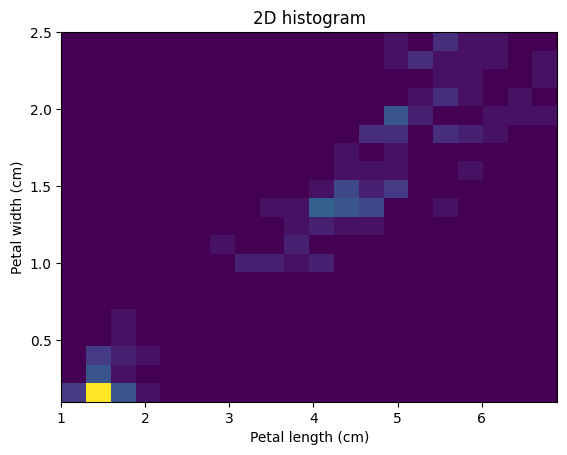

In [7]:
_ = plt.hist2d(
  df["petal length (cm)"],
  df["petal width (cm)"],
  bins = 20,
)
plt.title("2D histogram")
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")

### Mapa de calor (HeatMap)

- Similar a un histograma 2D
- Tienen variables categóricas o discretas en sus ejes.


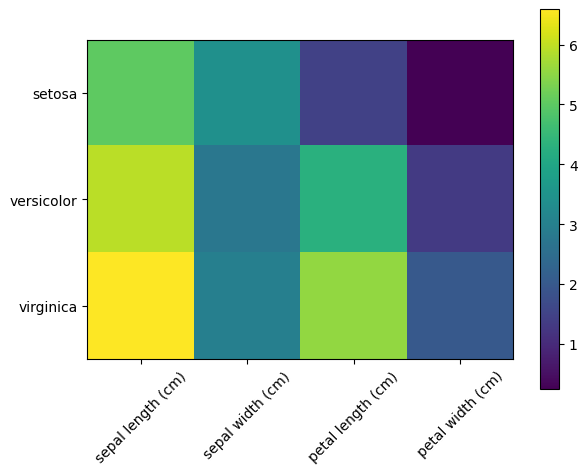

In [16]:
means_by_group = (
  df
    .groupby(
      by="target"
    )
    .aggregate(
      func = np.mean
    )
)
means_by_group.index = iris["target_names"]

im = plt.imshow(means_by_group)
plt.xticks(
  np.arange(len(means_by_group.columns)),
  means_by_group.columns,
  rotation = 45
)
plt.yticks(
  np.arange(len(iris["target_names"])),
  iris["target_names"]
)
cbar = plt.colorbar(im)
plt.tight_layout()


### Boxplots

- permiten observar estadísticos robustos de:
  - tendencia central (mediana)
  - de dispersión (rango entre cuartiles).


3.3
2.8
0.5
0.75


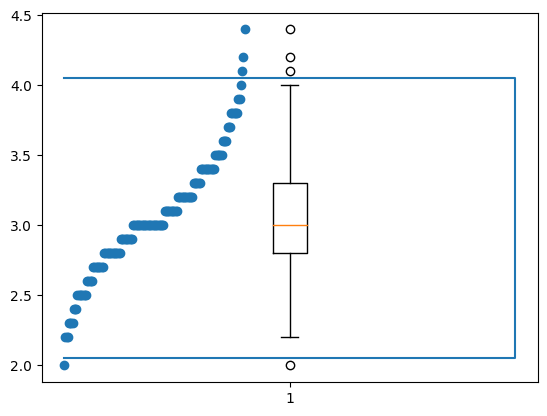

In [53]:
plt.boxplot(
  df.iloc[:, 1],
  whis = 1.5
)

print(df.iloc[:, 1].quantile(0.75))
print(df.iloc[:, 1].quantile(0.25))
iqr = df.iloc[:, 1].quantile(0.75) - df.iloc[:, 1].quantile(0.25)
print(iqr)
print(iqr * 1.5)
ubound = df.iloc[:, 1].quantile(0.75) + iqr * 1.5
lbound = df.iloc[:, 1].quantile(0.25) - iqr * 1.5
plt.plot(
  [0, 2, 2, 0],
  [ubound, ubound, lbound, lbound],
)
plt.scatter(
  np.linspace(0, 0.8, len(df.iloc[:, 1])),
  df.iloc[:, 1].sort_values()
)

([<matplotlib.axis.XTick at 0x7f8f934441f0>,
 [Text(1, 0, 'sepal length (cm)'),
  Text(2, 0, 'sepal width (cm)'),
  Text(3, 0, 'petal length (cm)'),
  Text(4, 0, 'petal width (cm)')])

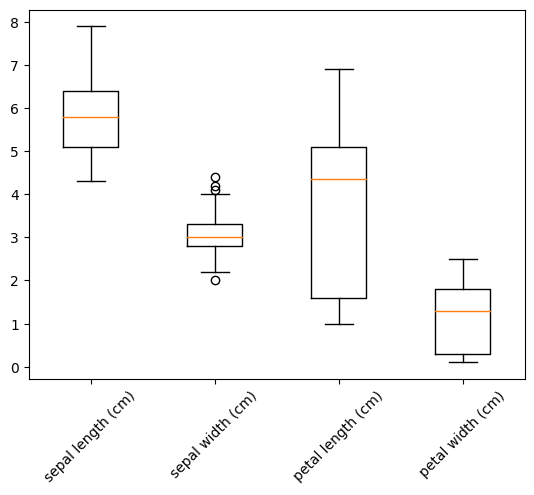

In [21]:
plt.boxplot(df.iloc[:,:4])
plt.xticks(
  np.arange(len(df.columns[:4]))+1,
  df.columns[:4],
  rotation = 45
)

# ```{r}
# new_data <- data.frame(
#   measure=c(
#     rep(
#       colnames(iris)[1:4],
#       each=nrow(iris))
#   ),
#   value=do.call(
#     what="c",
#     args=lapply(
#       colnames(iris[1:4]),
#       function(x) {return(iris[,x])}
#     )
#   )
# )

# boxplot(
#   value ~ measure,
#   new_data
# )

# ```


In [ ]:

Mientras los density plots permiten observar una PDF inferida a partir de los
datos, la función ecdf, permite observar la
función de densidad de probabilidad acumulada empírica de una muestra (Empirical
Cumulative Distribution Function ECDF), una aproximación a la CDF.

```{r}
?ecdf
f <- ecdf(iris$Sepal.Length)
xs <- seq(4,9,0.2)
xs

ys <- f(xs)
ys
plot(
  x=xs,
  y=ys,
  type="l"
  )
```


In [ ]:

### Ajuste de distribuciones estadísticas

Es posible, para los datos de una muestra, ajustar una distribución de densidad
de probabilidad (distribution fitting). Muchos de los estadísticos determinados
durante la exploración de datos pueden son los estimadores de máxima
verosimilitud o maximum-likelihood estimator (MLE) de algunas distribuciones.
Por ejemplo, la media es el estimador de máxima verosimilitud de la media
poblacional $\mu$ de una distribución normal. Tanto los estadísticos
cuantitativos, como el análisis gráfico realizado en la etapa de exploración
(histogramas, density plots, boxplots y ecdf) pueden ayudar a decidir cuál
familia de funciones de densidad de probabilidad debemos ajustar.
  
```{r}

par(mfrow=c(1,2))

normal_sample <- rnorm(
  100, 2, 3)

fitted <- fitdistr(
  normal_sample,
  densfun = "normal")
summary(fitted)

fitted$n
hist(
  normal_sample,
  10,
  freq = FALSE,
  ylim=c(0,0.25))

estimated_normal <- function(x){
  dnorm(
    x,
    fitted$estimate["mean"],
    fitted$estimate["sd"]
  )
}
curve(
  estimated_normal, 
  from=-6,
  to=10,
  add=TRUE,
  col="red",
  lwd=3)

xs <- seq(-6,10,0.2)
ys <- ecdf(x = normal_sample)(xs)
plot(
  x=xs,
  y=ys,
  type="l"
  )

estimated_normal_cdf <- function(x){
  pnorm(
    x,
    fitted$estimate["mean"],
    fitted$estimate["sd"]
  )
}

curve(
  estimated_normal_cdf, 
  from=-6,
  to=10,
  add=TRUE,
  col="red")



In [ ]:

```

```{r}
normal_sample <- rnorm(
  1000, 10, 3)

fitted <- fitdistr(
  normal_sample,
  densfun = "lognormal")
fitted$loglik

fitted <- fitdistr(
  normal_sample,
  densfun = "normal")
fitted$loglik

```


In [ ]:


### Tests de normalidad

Como parte del análisis inicial de datos, muchas veces debemos comprobar si los
valores de una variable en nuestra muestra se distribuyen de manera normal.
Existen diversas manera de testear normalidad, las más populares son:

#### Gráfico de probabilidad normal

Los gráficos QQ (qq plots por quantile) permiten comparar los cuantiles de dos
distribuciones. Cuando en uno de los ejes se colocan los cuantiles de una
distribución normal canónica, hablamos de un gráfico de probabilidad normalidad.
Si la distribución de los datos es aproximadamente normal, el gráfico de
normalidad mostrará los puntos equivalente a los datos distribuidos sobre una
línea.

```{r}
normal_sample <- rnorm(500, 1, 2)
qqnorm(normal_sample)
qqplot(
  normal_sample,
  rt(500, 3))
```


In [ ]:

#### Test de hipótesis

Existen diversos test de hipótesis para testear normalidad, estos tienen como
hipótesis nula que los datos provienen de una cierta distribución (en particular
de una distribución normal). Por lo tanto, p values altos son indicativos de que
no hay evidencia suficiente para rechazar que los datos provienen de una
distribución normal. Las dos pruebas de normalidad recomendadas son la de
Anderson-Darling y la prueba de Shapiro-Wilk, ambas poseen más poder que
Kolmogorov-Smirnov para esa tarea.


```{r}
normal_sample <- rnorm(50)
ad.test(normal_sample)
shapiro.test (normal_sample)
```


In [ ]:

### Teorización Post Hoc

Se denomina teorización *post hoc* a la generación de hipótesis sugeridas por el
conjunto de datos observado, sin testear esta hipótesis en nuevos datos. Hacerlo
puede resultar en aceptar hipótesis incorrectas, que sólo son válidas en el
presente conjunto de datos, dado que es más probable aceptar una hipótesis
testeada en el conjunto de datos en el cual se genero.

Es necesario testear estas nuevas hipotesis en una nueva muestra de la
población. Sin embargo, en muchas casos eso puede ser imposible, por ejemplo al
analizar un fenómeno natural finito. Este problema de disponer de un conjunto
limitado de datos, haciendo difícil o imposible la recolección de nuevos datos
para la fase de confirmación fue denominado por John Tukey como *uncomfortable
science*.

Un caso no tan obvio de *uncomfortable science* o de teorización *post hoc*
puede surgir bioinformática cuando se toman todos los elementos disponibles de
una base de datos para hacer los análisis exploratorios sin dejar datos
suficientes para testear las hipótesis que surgen de ese análisis. Otro proceso
que puede generar este tipo de problemas es el conocido como data fishing, el
cual consiste en ir testeando hipótesis sobre un conjunto de datos hasta
encontrar una un valor estadísticamente significativo en algún test de hipótesis.

El término *data fishing* posee una connotación negativa, dado que representa el
comportamiento poco ético de buscar, seleccionar e informar sólo los resultados
positivos sin el debido control, muchas veces como si las hipótesis hubiera sido
anterior al análisis (Leung 2011).

Buscar patrones en los datos, muchas veces aplicando test estadísticos, no es
incorrecto. Lo incorrecto es utilizar el mismo conjunto de datos (in-sample data)
para soportar esa hipótesis. Las alternativas posibles para no caer en este
problema son:

- Recolectar nuevos datos (out-of-sample data), realizar un nuevo experimento,
  para testear la nueva hipótesis.
- Si no es posible recolectar nuevos datos, es posible separar el conjunto de
  datos de manera aleatoria en dos grupos. Uno puede ser usado para plantear
  nuevas hipótesis, que luego serán testeadas en el otro conjunto.
- Dado que la teorización *post hoc* y los casos de uncomfortable science pueden
  terminar en sobreajuste (overfitting), los métodos de validación cruzada
  (cross validation) pueden resultar útiles para evitarlo.
- Aplicar correcciones por testeo múltiple, considerando todas las hipótesis
  testeadas (por ejemplo, todas las hipótesis testeadas durante el proceso de
  data fishing).




